<a href="https://colab.research.google.com/github/purshottamkumarr/Deep-Learning-learning-project/blob/main/CIFAR_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
## Configuring the path of kaggle.jason file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
## dataset Api
!kaggle competitions download -c cifar-10

 97% 694M/715M [00:05<00:00, 99.5MB/s]
100% 715M/715M [00:05<00:00, 132MB/s] 


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data


In [ ]:
## Extracting the Compressed Datasets

from zipfile import ZipFile
dataset = "/content/cifar-10.zip"

with ZipFile(dataset,"r") as zip:
  zip.extractall()
  print("The Dataset is Extracted :")


The Dataset is Extracted :


In [ ]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [ ]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 26.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.2/411.2 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 65.5 MB/s eta 0:00:00


In [ ]:
import py7zr
dataset_2 = py7zr.SevenZipFile("/content/train.7z",mode ="r")
dataset_2.extractall()
dataset_2.close()

In [ ]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


In [ ]:
## importing the dependencies

import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split


In [ ]:
data = os.listdir("/content/train")

In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
print(data[0:5])

['35689.png', '20635.png', '2720.png', '1575.png', '40560.png']


In [ ]:
print(data[-5:])

['23014.png', '6381.png', '34915.png', '41974.png', '21411.png']


In [ ]:
## Label Processing

label = pd.read_csv("/content/trainLabels.csv")

In [ ]:
print(label.shape)

(50000, 2)


In [ ]:
label.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [ ]:
label.tail(10)

,id,label
49990,49991,deer
49991,49992,bird
49992,49993,airplane
49993,49994,automobile
49994,49995,airplane
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [ ]:
label["label"].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [ ]:
list_directory = {"frog":0,"truck":1,"deer":2,"automobile":3,"bird":4,"horse":5,"ship":6,"cat":7,"dog":8,"airplane":9}
print(list_directory)

{'frog': 0, 'truck': 1, 'deer': 2, 'automobile': 3, 'bird': 4, 'horse': 5, 'ship': 6, 'cat': 7, 'dog': 8, 'airplane': 9}


In [ ]:
labels = [list_directory[i] for i in label["label"]]

In [ ]:
print(labels[0:5])
print(labels[-5:])

[0, 1, 1, 2, 3]
[4, 0, 1, 3, 3]


In [ ]:
label["label"]

0              frog
1             truck
2             truck
3              deer
4        automobile
            ...    
49995          bird
49996          frog
49997         truck
49998    automobile
49999    automobile
Name: label, Length: 50000, dtype: object

Displaying The Sample Image

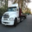

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread("/content/train/20635.png")
cv2_imshow(img)

In [ ]:
label[label["id"]==20635]

,id,label
20634,20635,truck


In [ ]:
id_list = list(label["id"])


In [ ]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Proceesing

Conerting the Image into Numpy Array

In [ ]:

train_data_folder = "/content/train/"

data = []

for id in id_list:
  img_path = train_data_folder + str(id) + ".png"
  print(img_path)

  if id >= 5:
    break



/content/train/1.png
/content/train/2.png
/content/train/3.png
/content/train/4.png
/content/train/5.png


In [ ]:
train_data_folder = "/content/train/"

data = []

for id in id_list:
  img_path = Image.open(train_data_folder + str(id) + ".png")
  img_path= np.array(img_path)

  data.append(img_path)


In [ ]:
type(data)

list

In [ ]:
len(data)

50000

In [ ]:
type(data[0])


numpy.ndarray

In [ ]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
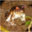

In [ ]:
data[0]

converting Image list and Labels List into Nump Array

In [ ]:
x = np.array(data)
y = np.array(labels)

In [ ]:
type(x)

numpy.ndarray

In [ ]:
print(x.shape)
print(y.shape)

(50000, 32, 32, 3)
(50000,)


Training test Split


In [ ]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state = 2)

In [ ]:
print(x.shape,x_train.shape,x_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


Scaling the Data

In [ ]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [ ]:
x_test_scaled

array([[[[0.99215686, 0.87843137, 0.71764706],
         [0.99215686, 0.88235294, 0.7254902 ],
         [0.99607843, 0.89411765, 0.73333333],
         ...,
         [1.        , 0.88627451, 0.72941176],
         [0.99607843, 0.88235294, 0.7254902 ],
         [0.99215686, 0.87843137, 0.72156863]],

        [[0.97647059, 0.8745098 , 0.71764706],
         [0.98039216, 0.87843137, 0.7254902 ],
         [0.98431373, 0.89019608, 0.74117647],
         ...,
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549],
         [0.98039216, 0.86666667, 0.71372549]],

        [[0.98039216, 0.88235294, 0.72941176],
         [0.98823529, 0.89411765, 0.74509804],
         [0.99607843, 0.90588235, 0.76078431],
         ...,
         [0.99215686, 0.8745098 , 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706],
         [0.98431373, 0.87058824, 0.71372549]],

        ...,

        [[0.98431373, 0.87058824, 0.71372549],
         [0.98823529, 0.8745098 , 0.71764706]

In [ ]:
x_train_scaled

array([[[[0.81960784, 0.82352941, 0.79607843],
         [0.83529412, 0.83921569, 0.81960784],
         [0.85490196, 0.85882353, 0.84313725],
         ...,
         [0.49803922, 0.29019608, 0.15294118],
         [0.47843137, 0.26666667, 0.1372549 ],
         [0.45490196, 0.24705882, 0.1254902 ]],

        [[0.82352941, 0.82352941, 0.79215686],
         [0.83529412, 0.83921569, 0.81176471],
         [0.85490196, 0.8627451 , 0.83921569],
         ...,
         [0.48627451, 0.2745098 , 0.1372549 ],
         [0.4745098 , 0.2627451 , 0.12941176],
         [0.48235294, 0.27058824, 0.14117647]],

        [[0.80784314, 0.80392157, 0.76470588],
         [0.81960784, 0.81960784, 0.79215686],
         [0.83529412, 0.84313725, 0.81960784],
         ...,
         [0.48627451, 0.2745098 , 0.14509804],
         [0.51372549, 0.30196078, 0.16470588],
         [0.51372549, 0.30588235, 0.16078431]],

        ...,

        [[0.49803922, 0.42352941, 0.38039216],
         [0.54117647, 0.47843137, 0.43137255]

Building The Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
no_of_class = 10

## Setting up the Layer of Neural Network

model = keras.Sequential([
    keras.layers.Flatten(input_shape = (32,32,3)),
    keras.layers.Dense(64, activation = "relu"),
    keras.layers.Dense(no_of_class,activation = "softmax")

])

complie the Neural Network

In [ ]:
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["acc"])

Training The Neural Network

In [ ]:
model.fit(x_train_scaled, y_train, validation_split= 0.1,epochs =10)



Epoch 1/10
1125/1125 [==============================] - 9s 7ms/step - loss: 2.0493 - acc: 0.2297 - val_loss: 1.9122 - val_acc: 0.2705
Epoch 2/10
1125/1125 [==============================] - 11s 9ms/step - loss: 1.8951 - acc: 0.2902 - val_loss: 1.8706 - val_acc: 0.2940
Epoch 3/10
1125/1125 [==============================] - 8s 7ms/step - loss: 1.8718 - acc: 0.3081 - val_loss: 1.8517 - val_acc: 0.3110
Epoch 4/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.8552 - acc: 0.3154 - val_loss: 1.9365 - val_acc: 0.2910
Epoch 5/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.8508 - acc: 0.3220 - val_loss: 1.8247 - val_acc: 0.3277
Epoch 6/10
1125/1125 [==============================] - 8s 7ms/step - loss: 1.8371 - acc: 0.3296 - val_loss: 1.8239 - val_acc: 0.3305
Epoch 7/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.8344 - acc: 0.3325 - val_loss: 1.8398 - val_acc: 0.3198
Epoch 8/10
1125/1125 [==============================] - 6s 6m

ResNet50

In [ ]:
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers


In [ ]:
convolutional_base = ResNet50(weights="imagenet",include_top=False,input_shape=(256,256,3))
convolutional_base.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                      